# Laboratory Session 4

In [1]:
library(ggplot2)
library(reshape2)
library(tibble)

## Exercise 1 - Six Boxes Toy Model : inference
Write an R program that:
1) allows the user to insert the color of a randomly extracted box and

2) prints on the standard output the probability of selecting each box

3) plots the probability for each box as a function of the extraction step

extraction #1, a white ball: H_0:  0.00e+00,   H_1:  6.67e-02,   H_2:  1.33e-01,   H_3:  2.00e-01,   H_4:  2.67e-01,   H_5:  3.33e-01,   

extraction #2, a white ball: H_0:  0.00e+00,   H_1:  1.82e-02,   H_2:  7.27e-02,   H_3:  1.64e-01,   H_4:  2.91e-01,   H_5:  4.55e-01,   

extraction #3, a white ball: H_0:  0.00e+00,   H_1:  4.44e-03,   H_2:  3.56e-02,   H_3:  1.20e-01,   H_4:  2.84e-01,   H_5:  5.56e-01,   

extraction #4, a white ball: H_0:  0.00e+00,   H_1:  1.02e-03,   H_2:  1.63e-02,   H_3:  8.27e-02,   H_4:  2.61e-01,   H_5:  6.38e-01,   

extraction #5, a white ball: H_0:  0.00e+00,   H_1:  2.26e-04,   H_2:  7.23e-03,   H_3:  5.49e-02,   H_4:  2.31e-01,   H_5:  7.06e-01,   

extraction #6, a black ball: H_0:  0.00e+00,   H_1:  2.48e-03,   H_2:  5.96e-02,   H_3:  3.02e-01,   H_4:  6.36e-01,   H_5:  0.00e+00,   

extraction #7, a white ball: H_0:  0.00e+00,   H_1:  6.96e-04,   H_2:  3.34e-02,   H_3:  2.54e-01,   H_4:  7.12e-01,   H_5:  0.00e+00,   

extraction #8, a black ball

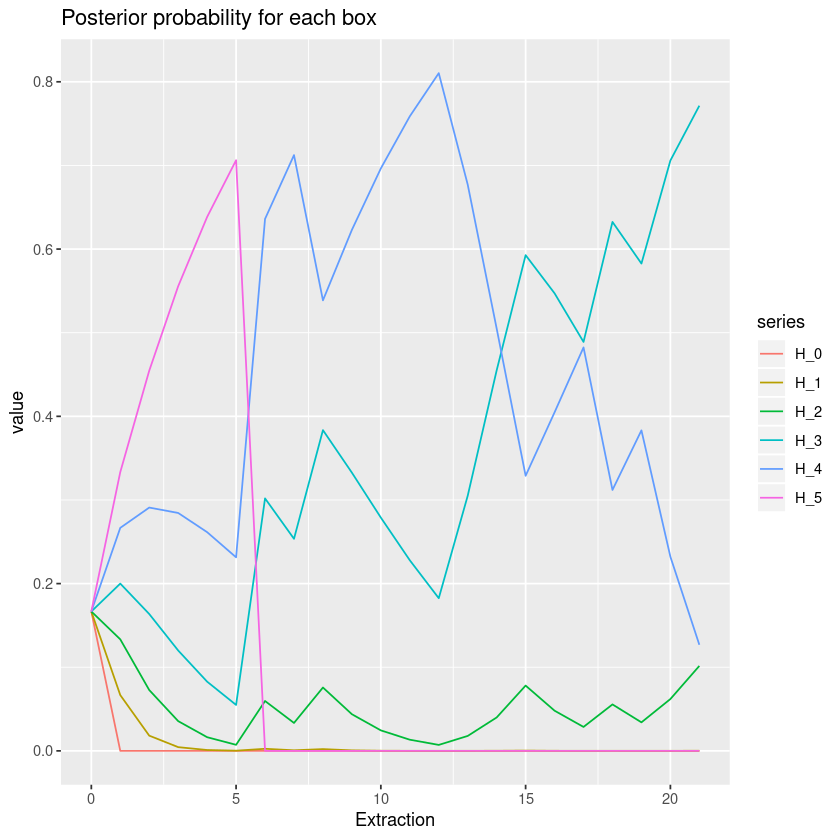

In [2]:
# read draw
# show how likely is each box
# plot
box_posts <- function(ex, priors){
    # Generates the posterior probability for each box given a prior
    lhoods <- 1*ex+(-1)**ex*5:0/5
    almost_posts <- lhoods*priors
    evidence <- sum(almost_posts)
    posts <- almost_posts/evidence
    return(posts)
}

posts_plot <- function(posteriors,N){
    # Specialized plot for box posteriors per step
    posteriors <- tibble(as.data.frame(posteriors))
    colnames(posteriors) <- c('H_0', 'H_1', 'H_2', 'H_3', 'H_4', 'H_5')
    posteriors['Extraction'] <- 0:N
    df <- melt(posteriors, id.vars='Extraction', variable.name = 'series')
    plotties <- ggplot(df, aes(Extraction,value)) + geom_line(aes(colour = series)) + ggtitle('Posterior probability for each box')
    return(plotties)
}


missing_draws <- TRUE
N <- 0
n_boxes <- 6
priors <- rep(1/n_boxes,6)
posts <- priors
while(missing_draws){
    N <- N + 1
    new_draw <- readline(prompt = "What's the color? 1 for white, 0 for black.")
    ex <- as.integer(new_draw)
    color <- ifelse(ex,'white','black')
    priors <- box_posts(ex,priors)
    posts <- rbind(posts,priors)
    print_posts <- paste(paste0('H_',0:5,':  ',formatC(priors,format = 'e', digits = 2), ',   '), collapse = '')
    message('extraction #', N, ', a ', color, ' ball', ': ', print_posts)
    missing_draws <- (readline(prompt = "Are there any further extractions? 1 if yes, any other value if not."))
    missing_draws <- ifelse(missing_draws==1,TRUE,FALSE)
}
plot(posts_plot(posts,N))

## Exercise 2 - Six Boxes Toy Model: simulation
Consider again the six boxes toy model of the previous exercise and write a simulation
program that:
1) selects a random box
2) makes random sampling from the box
3) prints on the standard output the probability of selecting each box
4) plots the probability for each box as a function of the number of trial

In [3]:
six_boxes <- function(extractions){

    n_boxes <- 6
    box_size <- n_boxes-1
    # The prior is the same for each box
    p_box <- 1/n_boxes

    p_w <- sum(0:box_size)*p_box/box_size
    p_b <- 1 - p_w
    # with the assumption for the balls distribution
    
    prior <- p_box
    posteriors <- matrix(rep(prior,n_boxes*(length(extractions)+1)),c(length(extractions)+1,n_boxes))
    for(i in 1:length(extractions)){
        ex <- extractions[i]
        priors <- posteriors[i,]
        posteriors[i+1,] <- box_posts(ex,priors)
    }
    
    plotties <- posts_plot(posteriors, length(extractions))
    plot(plotties)
    posteriors <- tibble(as.data.frame(posteriors))
    colnames(posteriors) <- c('H_0', 'H_1', 'H_2', 'H_3', 'H_4', 'H_5')
    return(posteriors)
}

extractions <- function(size){
    box_number <- sample(0:5,1)
    box <- rep(0,5)
    if(box_number>0) box[1:box_number] <- rep(1,box_number)

    message('Sampling ', size, ' times from box ', box_number)
    return(sample(box,size,replace=TRUE))
}

simulate <- function(size){
    balls <- extractions(size)
    six_boxes(balls)
}

Sampling 12 times from box 3



H_0,H_1,H_2,H_3,H_4,H_5
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.1666667,0.166666667,0.1666667,0.1666667,0.16666667,0.1666667
0.3333333,0.266666667,0.2000000,0.1333333,0.06666667,0.0000000
0.0000000,0.200000000,0.3000000,0.3000000,0.20000000,0.0000000
0.0000000,0.320000000,0.3600000,0.2400000,0.08000000,0.0000000
0.0000000,0.438356164,0.3698630,0.1643836,0.02739726,0.0000000
0.0000000,0.246153846,0.4153846,0.2769231,0.06153846,0.0000000
0.0000000,0.114285714,0.3857143,0.3857143,0.11428571,0.0000000
0.0000000,0.045714286,0.3085714,0.4628571,0.18285714,0.0000000
0.0000000,0.016427105,0.2217659,0.4989733,0.26283368,0.0000000


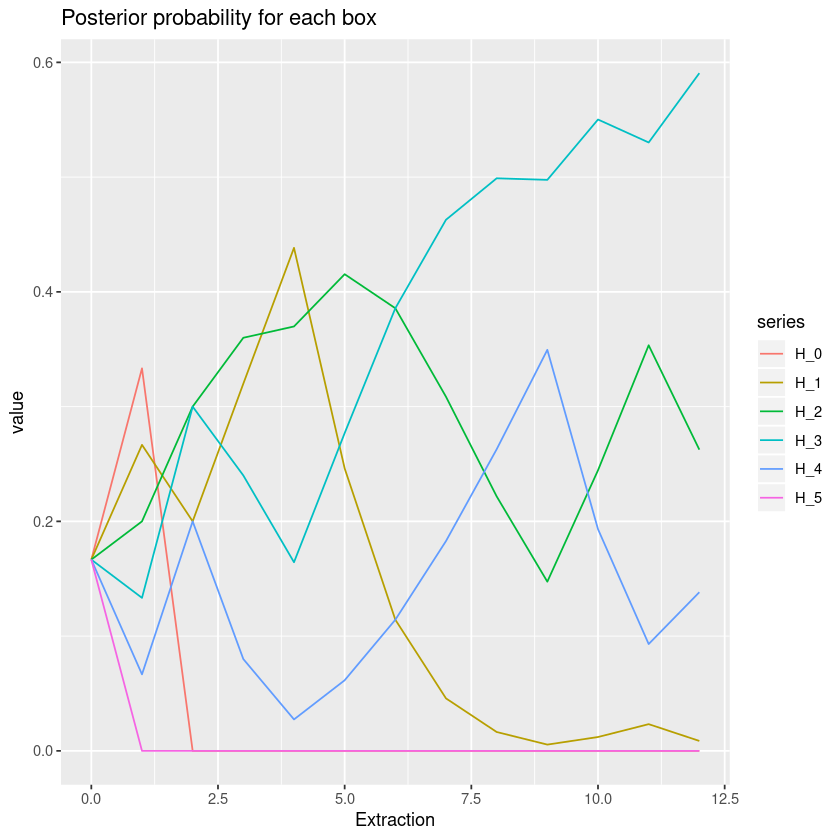

In [4]:
simulate(12)

## Exercise 3
- An important property of the gamma distribution is the so-called _reproductive property_
- given a sequence of independent random variable $X_j ∼ \text{Gamma}(\alpha_j, \beta)$, it follows that
$$
\begin{align}
Y=\sum_j X_j\to Y ~ \text{Gamma}(\alpha,\beta), \alpha = \sum_j \alpha_j
\end{align}
$$
if $\alpha = m$ is an integer, a random variable from gamma distribution $\text{Gamma}(m, \beta)$ (also known as Erlang distribution) can be obtained by summing m independent exponential
random variables $X_j ∼ \text{Exp}(\beta)$:
$$
\begin{align}
Y=\frac{1}{\beta}\sum_j(-\ln U_j)=-\frac{1}{\beta}\ln\prod_j U_j
\end{align}
$$

Write an algorithm to sample variables from an Erlang distribution $\text{Gamma}(m, \beta)$


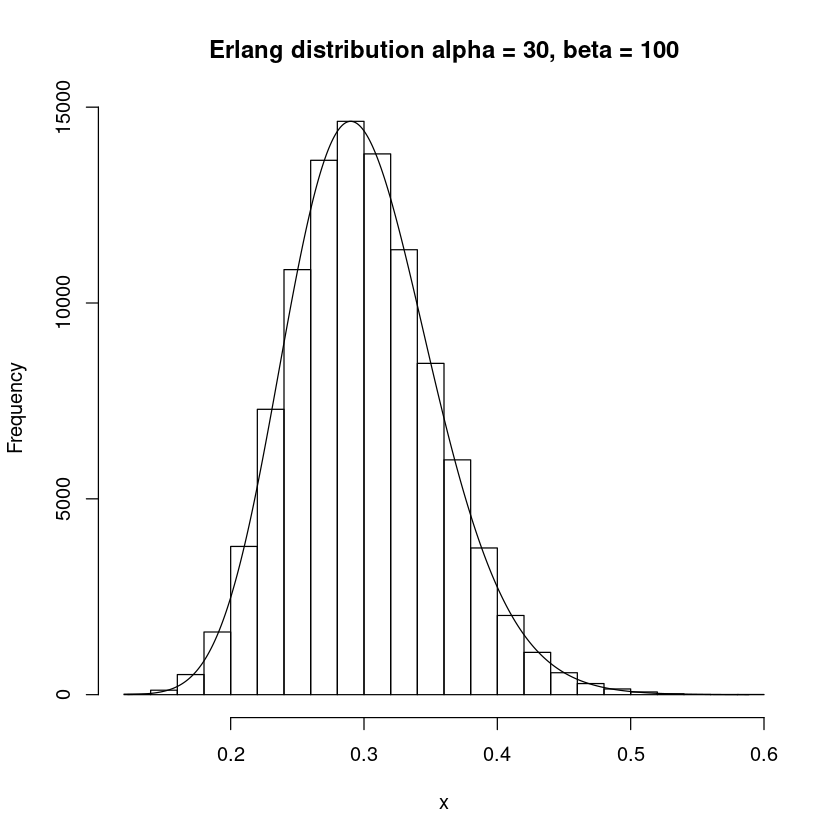

In [5]:
int_erlang <- function(N,m,bet) replicate(N,-sum(log(runif(m)))/bet)

# Making a histogram of the defined erlang function algorithm
x_sample <- int_erlang(100000,30,100)
histo_df <- hist(x_sample, main = 'Erlang distribution alpha = 30, beta = 100', xlab = 'x')

# Superposing an actual gamma density function, scaled
x_min <- min(x_sample)
x_max <- max(x_sample)
range <- seq(x_min,x_max,0.001)
amplitude <- max(histo_df$counts)/max(dgamma(range,30,100))
lines(range,amplitude*dgamma(range,30,100))

## Exercise 4
One of the first random number generator was proposed by von Neumann, the so-called middle square algorithm.

Write R code to implement this type of generator and, given a fixed digit number input, square it an remove the leading and trailing digits, in order to return a number with the same number of digits as the original number.

In [6]:
mid_sq_alg <- function(input){
    in_digits <- length(unlist(strsplit(as.character(input),"")))
    number <- unlist(strsplit(as.character(input**2),""))
    sq_digits <- length(number)
    i <- 2
    # If the current start digit of the squared number is zero,
    # we review whether there would be enough digits left to trim if we started from the next digit.
    # We are trying to get a number with the same number of digits as the input, not more, not less.
    while(number[i]=='0' & in_digits+i<sq_digits){
        i <- i+1
    }
    new_number <- number[i:(in_digits+i-1)]
    new_number <- as.numeric(paste(new_number, collapse=""))
    return(new_number)
}


In [7]:
mid_sq_alg(123098)

[1] 515311